In [2]:
#Carregando as bibliotecas necess√°rias para o tratamento dos dados
import pandas as pd
import re
import nltk
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
import spacy.cli
spacy.cli.download("pt_core_news_sm")
import pt_core_news_sm
spc_pt = pt_core_news_sm.load()
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer

%matplotlib inline

‚úî Download and installation successful
You can now load the model via spacy.load('pt_core_news_sm')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\flash\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# carregando o dataset
data = pd.read_csv(r'csvs\archive\olist_order_reviews_dataset.csv')

In [4]:
#verificando a sa√≠da
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [5]:
data.head()

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parab√©ns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

In [6]:
#Retirando as colunas que n√£o vamos utilizar na an√°lise de NLP
data.drop(['review_creation_date', 'review_answer_timestamp'],
          1, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   review_id               99224 non-null  object
 1   order_id                99224 non-null  object
 2   review_score            99224 non-null  int64 
 3   review_comment_title    11568 non-null  object
 4   review_comment_message  40977 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [7]:
#Verificando valores duplicados (pela coluna review_id)
data[data.duplicated("review_id", keep =  False)].sort_values(by = "review_id")

review_id                          order_id  \
46678  00130cbe1f9d422698c812ed8ded1919  dfcdfc43867d1c1381bfaf62d6b9c195   
29841  00130cbe1f9d422698c812ed8ded1919  04a28263e085d399c97ae49e0b477efa   
90677  0115633a9c298b6a98bcbe4eee75345f  78a4201f58af3463bdab842eea4bc801   
63193  0115633a9c298b6a98bcbe4eee75345f  0c9850b2c179c1ef60d2855e2751d1fa   
92876  0174caf0ee5964646040cd94e15ac95e  f93a732712407c02dce5dd5088d0f47b   
...                                 ...                               ...   
31120  fe5c833752953fed3209646f1f63b53c  4863e15fa53273cc7219c58f5ffda4fb   
7870   ff2fc9e68f8aabfbe18d710b83aabd30  2da58e0a7dcfa4ce1e00fad9d03ca3b5   
82521  ff2fc9e68f8aabfbe18d710b83aabd30  1078d496cc6ab9a8e6f2be77abf5091b   
73951  ffb8cff872a625632ac983eb1f88843c  c44883fc2529b4aa03ca90e7e09d95b6   
1985   ffb8cff872a625632ac983eb1f88843c  c88b1d1b157a9999ce368f218a407141   

       review_score review_comment_title  \
46678             1                  NaN   
29841             1                  NaN   
90677             5                  NaN   
63193             5                  NaN   
92876             1                  NaN   
...             ...                  ...   
31120             1                  NaN   
7870              2                  NaN   
82521             2                  NaN   
73951             3                  NaN   
1985              3                  NaN   

                                  review_comment_message  
46678  O cartucho "original HP" 60XL n√£o √© reconhecid...  
29841  O cartucho "original HP" 60XL n√£o √© reconhecid...  
90677                                                NaN  
63193                                                NaN  
92876  Produto entregue dentro de embalagem do fornec...  
...                                                  ...  
31120  Comprei dois produtos e ambos, mesmo enviados ...  
7870                                                 NaN  
82521                                                NaN  
73951                                                NaN  
1985                                                 NaN  

[1603 rows x 5 columns]

In [8]:
# remove os duplicados para nao influenciar no desempenho do modelo preditivo
data.drop_duplicates("review_id", inplace = True) 

In [9]:
#Como temos colunas com dados semelhantes, vamos unir as colunas 
#titulo do coment√°rio e o coment√°rio. Para n√£o haver problemas,
#vamos preencher os valores nulos com ''
data.fillna('', inplace = True)

In [10]:
# concatenando as duas colunas
data['review'] = data['review_comment_title'] + ' ' + data['review_comment_message']

In [11]:
# removendo entradas sem texto
data = data[data['review'] != ' ']
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42389 entries, 3 to 99223
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   review_id               42389 non-null  object
 1   order_id                42389 non-null  object
 2   review_score            42389 non-null  int64 
 3   review_comment_title    42389 non-null  object
 4   review_comment_message  42389 non-null  object
 5   review                  42389 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.3+ MB


In [12]:
data.head()

review_id                          order_id  \
3   e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4   f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
9   8670d52e15e00043ae7de4c01cc2fe06  b9bf720beb4ab3728760088589c62129   
12  4b49719c8a200003f700d3d986ea1a19  9d6f15f95d01e79bd1349cc208361f09   
15  3948b09f7c818e2d86c9a546758b2335  e51478e7e277a83743b6f9991dbfa3fb   

    review_score review_comment_title  \
3              5                        
4              5                        
9              4            recomendo   
12             4                        
15             5      Super recomendo   

                               review_comment_message  \
3               Recebi bem antes do prazo estipulado.   
4   Parab√©ns lojas lannister adorei comprar pela I...   
9   aparelho eficiente. no site a marca do aparelh...   
12    Mas um pouco ,travando...pelo valor ta Boa.\r\n   
15  Vendedor confi√°vel, produto ok e entrega antes...   

                                               review  
3               Recebi bem antes do prazo estipulado.  
4    Parab√©ns lojas lannister adorei comprar pela ...  
9   recomendo aparelho eficiente. no site a marca ...  
12    Mas um pouco ,travando...pelo valor ta Boa.\r\n  
15  Super recomendo Vendedor confi√°vel, produto ok...

In [13]:
#checando os valores das notas
data['review_score'].value_counts()

5    21672
1     8723
4     6241
3     3615
2     2138
Name: review_score, dtype: int64

In [14]:
#Criando r√≥tulos das notas na coluna 'labels'.
# para notas 1,2: valor 0
# a nota 3 ser√° descartada neste momento, pois h√° um misto de sentimentos nela
#as notas 4 3 5 recebem o valor 1, significando, valores positivos.

labels = []

for score in data['review_score']:
  if score > 3:
    labels.append(1)
  else:
    labels.append(0)

data['label'] = labels

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42389 entries, 3 to 99223
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   review_id               42389 non-null  object
 1   order_id                42389 non-null  object
 2   review_score            42389 non-null  int64 
 3   review_comment_title    42389 non-null  object
 4   review_comment_message  42389 non-null  object
 5   review                  42389 non-null  object
 6   label                   42389 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 2.6+ MB


In [16]:
filtro = data[data.review_score != 3]

In [17]:
data = filtro

In [18]:
#checando a sa√≠da
data


review_id                          order_id  \
3      e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4      f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
9      8670d52e15e00043ae7de4c01cc2fe06  b9bf720beb4ab3728760088589c62129   
12     4b49719c8a200003f700d3d986ea1a19  9d6f15f95d01e79bd1349cc208361f09   
15     3948b09f7c818e2d86c9a546758b2335  e51478e7e277a83743b6f9991dbfa3fb   
...                                 ...                               ...   
99203  5085bc489aa6b58a29c4f922d59ff826  18ed848509774f56cc8c1c0a1903ad7f   
99205  98fffa80dc9acbde7388bef1600f3b15  d398e9c82363c12527f71801bf0e6100   
99208  df5fae90e85354241d5d64a8955b2b09  509b86c65fe4e2ad5b96408cfef9755e   
99221  b3de70c89b1510c4cd3d0649fd302472  55d4004744368f5571d1f590031933e4   
99223  efe49f1d6f951dd88b51e6ccd4cc548f  90531360ecb1eec2a1fbb265a0db0508   

       review_score review_comment_title  \
3                 5                        
4                 5                        
9                 4            recomendo   
12                4                        
15                5      Super recomendo   
...             ...                  ...   
99203             2                        
99205             4                        
99208             5                        
99221             5                        
99223             1                        

                                  review_comment_message  \
3                  Recebi bem antes do prazo estipulado.   
4      Parab√©ns lojas lannister adorei comprar pela I...   
9      aparelho eficiente. no site a marca do aparelh...   
12       Mas um pouco ,travando...pelo valor ta Boa.\r\n   
15     Vendedor confi√°vel, produto ok e entrega antes...   
...                                                  ...   
99203  Tive um problema na entrega em que o correio c...   
99205  para este produto recebi de acordo com a compr...   
99208  Entregou dentro do prazo. O produto chegou em ...   
99221  Excelente mochila, entrega super r√°pida. Super...   
99223  meu produto chegou e ja tenho que devolver, po...   

                                                  review  label  
3                  Recebi bem antes do prazo estipulado.      1  
4       Parab√©ns lojas lannister adorei comprar pela ...      1  
9      recomendo aparelho eficiente. no site a marca ...      1  
12       Mas um pouco ,travando...pelo valor ta Boa.\r\n      1  
15     Super recomendo Vendedor confi√°vel, produto ok...      1  
...                                                  ...    ...  
99203   Tive um problema na entrega em que o correio ...      0  
99205   para este produto recebi de acordo com a comp...      1  
99208   Entregou dentro do prazo. O produto chegou em...      1  
99221   Excelente mochila, entrega super r√°pida. Supe...      1  
99223   meu produto chegou e ja tenho que devolver, p...      0  

[38774 rows x 7 columns]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


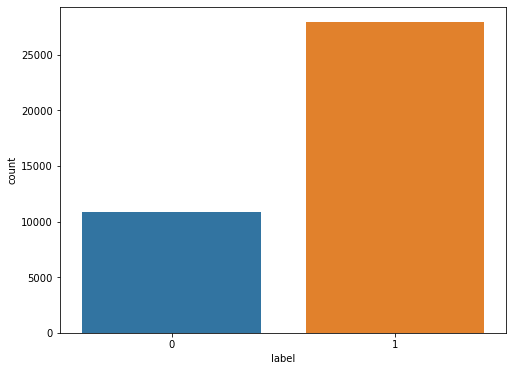

In [19]:
#plotando um gr√°fico par visualiza√ß√£o do label
plt.figure(figsize=(8,6))
sns.countplot(data['label'])
plt.show()

# Analisando o conte√∫do dos coment√°rios

In [20]:
#importando as bibliotecas necess√°rias
import matplotlib.pyplot as plt
from PIL import Image
import re
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
import nltk
import numpy as np
import pandas as pd
import wordcloud
nltk.download('stopwords')
nltk.download('rslp')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\flash\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\flash\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

# An√°lise de coment√°rios do setor de m√≥veis de escrit√≥rio na cidade de Itaquaquecetuba

In [21]:
# puxando outros datasets
sellers = pd.read_csv(r'csvs\archive\olist_sellers_dataset.csv')
items = pd.read_csv(r'csvs\archive\olist_order_items_dataset.csv')
products = pd.read_csv(r'csvs\archive\olist_products_dataset.csv')
orders = pd.read_csv(r'csvs\archive\olist_orders_dataset.csv')

In [22]:
# juntando os data sets
result = sellers.merge(items, on="seller_id", how="left")
result = result.merge(products, on='product_id', how='left')
result = result.merge(orders, on='order_id', how='left')
data_itaqua = data.merge(result, on='order_id', how='left')


In [23]:
# identificando dados duplicados
data_itaqua[data_itaqua.duplicated("review_id", keep =  False)].sort_values(by = "review_id")

review_id                          order_id  \
2780   001d005e8f06c039464425cf266248e8  d8711cd641288f4e2e1a84dc3c6ade21   
2781   001d005e8f06c039464425cf266248e8  d8711cd641288f4e2e1a84dc3c6ade21   
2892   00340557e47d90c6c5ba1dc739de566c  f82a2055f59b4ccf07be7a6e9d52debd   
2891   00340557e47d90c6c5ba1dc739de566c  f82a2055f59b4ccf07be7a6e9d52debd   
41550  00343e1d7afe6b95442fc008abe9763f  b55e03266fc482bd2d25a8116a8be42d   
...                                 ...                               ...   
41108  ffa91419c3521af8c9d224a198f59a27  93f27293d6f1881d4784abaf47d53ffe   
41107  ffa91419c3521af8c9d224a198f59a27  93f27293d6f1881d4784abaf47d53ffe   
673    ffba674dbbc0250e36889712458d81f3  f3c7f31502a61f206c30c674a4ada401   
674    ffba674dbbc0250e36889712458d81f3  f3c7f31502a61f206c30c674a4ada401   
672    ffba674dbbc0250e36889712458d81f3  f3c7f31502a61f206c30c674a4ada401   

       review_score review_comment_title  \
2780              4                        
2781              4                        
2892              5                        
2891              5                        
41550             2                        
...             ...                  ...   
41108             5                        
41107             5                        
673               1                        
674               1                        
672               1                        

                                  review_comment_message  \
2780   Inicialmente o pedido veio incompleto, passei ...   
2781   Inicialmente o pedido veio incompleto, passei ...   
2892   Gostei demais. Bem em conta e foi entregue sup...   
2891   Gostei demais. Bem em conta e foi entregue sup...   
41550  mercadorias meio confusas comprei 2 itens do m...   
...                                                  ...   
41108  Comprei o produto como original e veio um comp...   
41107  Comprei o produto como original e veio um comp...   
673    Vcs t√° deixando a desejar comprei produtos com...   
674    Vcs t√° deixando a desejar comprei produtos com...   
672    Vcs t√° deixando a desejar comprei produtos com...   

                                                  review  label  \
2780    Inicialmente o pedido veio incompleto, passei...      1   
2781    Inicialmente o pedido veio incompleto, passei...      1   
2892    Gostei demais. Bem em conta e foi entregue su...      1   
2891    Gostei demais. Bem em conta e foi entregue su...      1   
41550   mercadorias meio confusas comprei 2 itens do ...      0   
...                                                  ...    ...   
41108   Comprei o produto como original e veio um com...      1   
41107   Comprei o produto como original e veio um com...      1   
673     Vcs t√° deixando a desejar comprei produtos co...      0   
674     Vcs t√° deixando a desejar comprei produtos co...      0   
672     Vcs t√° deixando a desejar comprei produtos co...      0   

                              seller_id  seller_zip_code_prefix  \
2780   5075aaa8404020ae6aa8bf4792099b41                 37706.0   
2781   5075aaa8404020ae6aa8bf4792099b41                 37706.0   
2892   7d76b645482be4a332374e8223836592                  1511.0   
2891   7d76b645482be4a332374e8223836592                  1511.0   
41550  1025f0e2d44d7041d6cf58b6550e0bfa                  3204.0   
...                                 ...                     ...   
41108  229c3efbfb0ea2058de4ccdfbc3d784a                 30190.0   
41107  229c3efbfb0ea2058de4ccdfbc3d784a                 30190.0   
673    8931a84a914b3fe9b1ddaa4d704947ca                  8410.0   
674    8931a84a914b3fe9b1ddaa4d704947ca                  8410.0   
672    8931a84a914b3fe9b1ddaa4d704947ca                  8410.0   

           seller_city  ... product_length_cm  product_height_cm  \
2780   pocos de caldas  ...              16.0               25.0   
2781   pocos de caldas  ...              16.0               25.0   
2892         sao paulo  ...        

In [24]:
# removendo dados duplicados
data_itaqua.drop_duplicates("review_id", inplace = True) 

In [25]:
# filtrando colunas
filtro2 = data_itaqua[['review_id', 'review_score', 'review_comment_title', 'review_comment_message','review', 'seller_id', 'seller_city', 'product_category_name' ]]

In [26]:
data_itaqua = filtro2
data_itaqua

review_id  review_score review_comment_title  \
0      e64fb393e7b32834bb789ff8bb30750e             5                        
1      f7c4243c7fe1938f181bec41a392bdeb             5                        
2      8670d52e15e00043ae7de4c01cc2fe06             4            recomendo   
3      4b49719c8a200003f700d3d986ea1a19             4                        
4      3948b09f7c818e2d86c9a546758b2335             5      Super recomendo   
...                                 ...           ...                  ...   
45304  5085bc489aa6b58a29c4f922d59ff826             2                        
45305  98fffa80dc9acbde7388bef1600f3b15             4                        
45306  df5fae90e85354241d5d64a8955b2b09             5                        
45307  b3de70c89b1510c4cd3d0649fd302472             5                        
45308  efe49f1d6f951dd88b51e6ccd4cc548f             1                        

                                  review_comment_message  \
0                  Recebi bem antes do prazo estipulado.   
1      Parab√©ns lojas lannister adorei comprar pela I...   
2      aparelho eficiente. no site a marca do aparelh...   
3        Mas um pouco ,travando...pelo valor ta Boa.\r\n   
4      Vendedor confi√°vel, produto ok e entrega antes...   
...                                                  ...   
45304  Tive um problema na entrega em que o correio c...   
45305  para este produto recebi de acordo com a compr...   
45306  Entregou dentro do prazo. O produto chegou em ...   
45307  Excelente mochila, entrega super r√°pida. Super...   
45308  meu produto chegou e ja tenho que devolver, po...   

                                                  review  \
0                  Recebi bem antes do prazo estipulado.   
1       Parab√©ns lojas lannister adorei comprar pela ...   
2      recomendo aparelho eficiente. no site a marca ...   
3        Mas um pouco ,travando...pelo valor ta Boa.\r\n   
4      Super recomendo Vendedor confi√°vel, produto ok...   
...                                                  ...   
45304   Tive um problema na entrega em que o correio ...   
45305   para este produto recebi de acordo com a comp...   
45306   Entregou dentro do prazo. O produto chegou em...   
45307   Excelente mochila, entrega super r√°pida. Supe...   
45308   meu produto chegou e ja tenho que devolver, p...   

                              seller_id      seller_city  \
0      a1043bafd471dff536d0c462352beb48         ilicinea   
1      989becdce12ebc39863c2bceab6f3ca1         curitiba   
2      05ff92fedb5be47920fea08e501238b9     santo angelo   
3      db4350fd57ae30082dec7acbaacc17f9        sao paulo   
4      974cf2cb8f4b7add98709c30df02fe10       araraquara   
...                                 ...              ...   
45304  0b35c634521043bf4b47e21547b99ab5  teixeira soares   
45305  6560211a19b47992c3666cc44a7e94c0        sao paulo   
45306  432c37c9dfba871172ec162e20118b8c         brasilia   
45307  17ca9b9e9b9ef8fdb529001b49ebb50f            betim   
45308  7e3f87d16fb353f408d467e74fbd8014        sao paulo   

                   product_category_name  
0                     ferramentas_jardim  
1                          esporte_lazer  
2                        eletroportateis  
3                           beleza_saude  
4                 informatica_acessorios  
...                                  ...  
45304  construcao_ferramentas_construcao  
45305                 relogios_presentes  
45306                      esporte_lazer  
45307                          papelaria  
45308             informatica_acessorios  

[38774 rows x 8 columns]

<h3> Prepara√ß√£o do arquivo para cria√ß√£o de nuvem dos coment√°rios para as vendas de m√≥veis e escrit√≥rio na cidade de Itaquaquecetuba </h3>

In [27]:
# aplicando filtro pra Itaquaquecetuba
filtro3 = (data_itaqua['product_category_name'] == 'moveis_escritorio') & (data_itaqua['seller_city'] == 'itaquaquecetuba')
data_itaqua_moveis = data_itaqua[filtro3]

In [28]:
#trabalhando com o Stopwords
stopwords_pt = stopwords.words("portuguese")
stopwords_pt

['de',
 'a',
 'o',
 'que',
 'e',
 '√©',
 'do',
 'da',
 'em',
 'um',
 'para',
 'com',
 'n√£o',
 'uma',
 'os',
 'no',
 'se',
 'na',
 'por',
 'mais',
 'as',
 'dos',
 'como',
 'mas',
 'ao',
 'ele',
 'das',
 '√†',
 'seu',
 'sua',
 'ou',
 'quando',
 'muito',
 'nos',
 'j√°',
 'eu',
 'tamb√©m',
 's√≥',
 'pelo',
 'pela',
 'at√©',
 'isso',
 'ela',
 'entre',
 'depois',
 'sem',
 'mesmo',
 'aos',
 'seus',
 'quem',
 'nas',
 'me',
 'esse',
 'eles',
 'voc√™',
 'essa',
 'num',
 'nem',
 'suas',
 'meu',
 '√†s',
 'minha',
 'numa',
 'pelos',
 'elas',
 'qual',
 'n√≥s',
 'lhe',
 'deles',
 'essas',
 'esses',
 'pelas',
 'este',
 'dele',
 'tu',
 'te',
 'voc√™s',
 'vos',
 'lhes',
 'meus',
 'minhas',
 'teu',
 'tua',
 'teus',
 'tuas',
 'nosso',
 'nossa',
 'nossos',
 'nossas',
 'dela',
 'delas',
 'esta',
 'estes',
 'estas',
 'aquele',
 'aquela',
 'aqueles',
 'aquelas',
 'isto',
 'aquilo',
 'estou',
 'est√°',
 'estamos',
 'est√£o',
 'estive',
 'esteve',
 'estivemos',
 'estiveram',
 'estava',
 'est√°vamos',
 'estavam

In [29]:
#Como os adv√©rbios 'n√£o' e 'nem' s√£o importantes neste caso do e-commerce,
#vamos retirar essas palavras da lista de stopwords:
stopwords_pt.remove('n√£o')
stopwords_pt.remove('nem')

In [30]:
#Definindo as fun√ß√µes para tratamento do texto
def re_breakline(text_list):
    """
    Args:
    ----------
    text_list: list object with text content to be prepared [type: list]
    """
    
    # Aplicando regex
    return [re.sub('[\n\r]', ' ', r) for r in text_list]

# Criando a lista de coment√°rios das reviews
reviews1 = list(data_itaqua_moveis['review'].values)

# Aplicando regex
reviews_breakline1 = re_breakline(reviews1)

# atualizando o dataset
data_itaqua_moveis['review'] = reviews_breakline1
data_itaqua_moveis


<ipython-input-30-fb0c5b7eadac>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_itaqua_moveis['review'] = reviews_breakline1


review_id  review_score review_comment_title  \
170    5d6f9cddc8335878d8bf20c3bd4602e8             5       mega recomendo   
277    edd86e0af4dc62b340c60d846643cbf9             5           PRODUTO OK   
291    e47020cf52099bce9dc57524ea41218b             4                        
320    8f16e30ff188fe57a427fee7afb60c90             1                        
338    24203dee295cf23bd24b7ace9bca261f             1                        
...                                 ...           ...                  ...   
44669  521667297522866412a13bc230dd3c3b             5                        
44910  1e2bf06df77bdf3de0bf799f16c0f84d             5                        
45047  123381026f13c723cb967b14b1bc673a             5                        
45147  5d4beea8e2c71baee7f55c7ae3ae3313             1         Insatisfeita   
45153  0cac8fef1bcba2a3335b132807520f6d             1                        

                                  review_comment_message  \
170    Recebi meu produto corretamente e dentro do pr...   
277    prazo foi estendido,por√©m entregue no prazo di...   
291           Indico a loja compro sempre na lannister .   
320       O tampo da mesa chegou todo amassado e batido.   
338    Produto mais que passou do prazo de entregar, ...   
...                                                  ...   
44669  O produto foi entregue com bastante anteced√™nc...   
44910                         Prazo de entrega cumprido!   
45047  Adorei a cadeira, bonita, confort√°vel e f√°cil ...   
45147  A cadeira veio com defeito de fabrica, uma sol...   
45153  O produto veio com furos errado para montagem....   

                                                  review  \
170    mega recomendo Recebi meu produto corretamente...   
277    PRODUTO OK prazo foi estendido,por√©m entregue ...   
291           Indico a loja compro sempre na lannister .   
320       O tampo da mesa chegou todo amassado e batido.   
338     Produto mais que passou do prazo de entregar,...   
...                                                  ...   
44669   O produto foi entregue com bastante anteced√™n...   
44910                         Prazo de entrega cumprido!   
45047   Adorei a cadeira, bonita, confort√°vel e f√°cil...   
45147  Insatisfeita A cadeira veio com defeito de fab...   
45153   O produto veio com furos errado para montagem...   

                              seller_id      seller_city product_category_name  
170    7c67e1448b00f6e969d365cea6b010ab  itaquaquecetuba     moveis_escritorio  
277    7c67e1448b00f6e969d365cea6b010ab  itaquaquecetuba     moveis_escritorio  
291    7c67e1448b00f6e969d365cea6b010ab  itaquaquecetuba     moveis_escritorio  
320    7c67e1448b00f6e969d365cea6b010ab  itaquaquecetuba     moveis_escritorio  
338    7c67e1448b00f6e969d365cea6b010ab  itaquaquecetuba     moveis_escritorio  
...                                 ...              ...                   ...  
44669  7c67e1448b00f6e969d365cea6b010ab  itaquaquecetuba     moveis_escritorio  
44910  7c67e1448b00f6e969d365cea6b010ab  itaquaquecetuba     moveis_escritorio  
45047  7c67e1448b00f6e969d365cea6b010ab  itaquaquecetuba     moveis_escritorio  
45147  5058e8c1e82653974541e83690655b4a  itaquaquecetuba     moveis_escritorio  
45153  7c67e1448b00f6e969d365cea6b010ab  itaquaquecetuba     moveis_escritorio  

[420 rows x 8 columns]

In [31]:
def re_hiperlinks(text_list):
    """
    Args:
    ----------
    text_list: list object with text content to be prepared [type: list]
    """
    
    # Aplicando regex
    pattern = 'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    return [re.sub(pattern, ' link ', r) for r in text_list]

#  atualizando o dataset
reviews_hiperlinks1 = re_hiperlinks(reviews_breakline1)
data_itaqua_moveis['review'] = reviews_hiperlinks1

<ipython-input-31-002c489e5912>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_itaqua_moveis['review'] = reviews_hiperlinks1


In [32]:
def re_dates(text_list):
    """
    Args:
    ----------
    text_list: list object with text content to be prepared [type: list]
    """
    
    # Aplicando regex
    pattern = '([0-2][0-9]|(3)[0-1])(\/|\.)(((0)[0-9])|((1)[0-2]))(\/|\.)\d{2,4}'
    return [re.sub(pattern, ' data ', r) for r in text_list]
# Atualizando o dataset
reviews_dates1 = re_dates(reviews_hiperlinks1)
data_itaqua_moveis['review'] = reviews_dates1


<ipython-input-32-66dfbdd72ef7>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_itaqua_moveis['review'] = reviews_dates1


In [33]:
def re_money(text_list):
    """
    Args:
    ----------
    text_list: list object with text content to be prepared [type: list]
    """
    
    # Aplicando regex
    pattern = '[R]{0,1}\$[ ]{0,}\d+(,|\.)\d+'
    return [re.sub(pattern, ' dinheiro ', r) for r in text_list]
# Aplicando RegEx
reviews_money1 = re_money(reviews_dates1)
data_itaqua_moveis['review'] = reviews_money1


<ipython-input-33-d55e952dfb66>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_itaqua_moveis['review'] = reviews_money1


In [34]:
def re_numbers(text_list):
    """
    Args:
    ----------
    text_series: list object with text content to be prepared [type: list]
    """
    
    # Aplicando regex
    return [re.sub('[0-9]+', ' numero ', r) for r in text_list]
# Atualizando o dataset
reviews_numbers1 = re_numbers(reviews_money1)
data_itaqua_moveis['review'] = reviews_numbers1


<ipython-input-34-85c0571c2fa3>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_itaqua_moveis['review'] = reviews_numbers1


In [35]:
def re_negation(text_list):
    """
    Args:
    ----------
    text_series: list object with text content to be prepared [type: list]
    """
    
    # AppAplicando regex
    return [re.sub('([nN][√£√ÉaA][oO]|[√±√ë]| [nN] )', ' nega√ß√£o ', r) for r in text_list]
#Atualizando o dataset
reviews_negation1 = re_negation(reviews_numbers1)
data_itaqua_moveis['review'] = reviews_negation1


<ipython-input-35-6774032de8e7>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_itaqua_moveis['review'] = reviews_negation1


In [36]:
def re_special_chars(text_list):
    """
    Args:
    ----------
    text_series: list object with text content to be prepared [type: list]
    """
    
    # Aplicando regex
    return [re.sub('\W', ' ', r) for r in text_list]

# Atualizando o dataset
reviews_special_chars1 = re_special_chars(reviews_negation1)
data_itaqua_moveis['review'] = reviews_special_chars1

<ipython-input-36-5a7df26c772c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_itaqua_moveis['review'] = reviews_special_chars1


In [37]:
def re_whitespaces(text_list):
    """
    Args:
    ----------
    text_series: list object with text content to be prepared [type: list]
    """
    
    # Apicando regex
    white_spaces = [re.sub('\s+', ' ', r) for r in text_list]
    white_spaces_end = [re.sub('[ \t]+$', '', r) for r in white_spaces]
    return white_spaces_end

# Atualizando o dataset
reviews_whitespaces1 = re_whitespaces(reviews_special_chars1)
data_itaqua_moveis['review'] = reviews_whitespaces1


<ipython-input-37-5ff182e85054>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_itaqua_moveis['review'] = reviews_whitespaces1


In [38]:
# Fun√ß√£o para remover o stopwords e transfomar em caixa baixa

def stopwords_removal(text, cached_stopwords=stopwords.words('portuguese')):
    """
    Args:
    ----------
    text: list object where the stopwords will be removed [type: list]
    cached_stopwords: stopwords to be applied on the process [type: list, default: stopwords.words('portuguese')]
    """
    
    return [c.lower() for c in text.split() if c.lower() not in cached_stopwords]

# Aplicando e atualizando o dataset
reviews_stopwords1 = [' '.join(stopwords_removal(review)) for review in reviews_whitespaces1]
data_itaqua_moveis['review'] = reviews_stopwords1


<ipython-input-38-3ae9fdb353af>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_itaqua_moveis['review'] = reviews_stopwords1


In [40]:
#Separando palavras
pal_positiva1 = data_itaqua_moveis[data_itaqua_moveis['review_score'] >3]
pal_negativa1 = data_itaqua_moveis[data_itaqua_moveis['review_score'] <3]


review_id  review_score review_comment_title  \
320    8f16e30ff188fe57a427fee7afb60c90             1                        
338    24203dee295cf23bd24b7ace9bca261f             1                        
368    70d2258489cae12a65d36c8c09fd54c1             1                        
1233   9b85b90c837dc4bb8ebc3bc62e2f86ab             1                        
1555   2cfe9b52787853c8f008a1132d1619be             2                        
...                                 ...           ...                  ...   
43616  c8b00b8c7a3d22c6e66417bdc3aac0e8             1                        
44064  3df7ea1385e999f44ef91f84956d7672             1                        
44434  4a96759784e9f1085af081331a9c3022             1                        
45147  5d4beea8e2c71baee7f55c7ae3ae3313             1         Insatisfeita   
45153  0cac8fef1bcba2a3335b132807520f6d             1                        

                                  review_comment_message  \
320       O tampo da mesa chegou todo amassado e batido.   
338    Produto mais que passou do prazo de entregar, ...   
368    Comprei Rosa com Bra√ßos Brancos e entregam tod...   
1233   Tentei obter uma resposta sobre o atraso de me...   
1555   J√° foi protocolizada junto ao stark pedido de ...   
...                                                  ...   
43616           O produto chegou com uns parte quebrada    
44064             S√≥ recebi 01 cadeira, ainda falta uma.   
44434   Pedi duas cadeiras e foi entregue apenas uma!!!!   
45147  A cadeira veio com defeito de fabrica, uma sol...   
45153  O produto veio com furos errado para montagem....   

                                                  review  \
320               tampo mesa chegou todo amassado batido   
338    produto passou prazo entregar tento resolver p...   
368      comprei rosa bra√ßos brancos entregam toda preta   
1233   tentei obter resposta sobre atraso pedido dire...   
1555   protocolizada junto stark pedido cancelamento ...   
...                                                  ...   
43616                  produto chegou uns parte quebrada   
44064                  recebi numero cadeira ainda falta   
44434                 pedi duas cadeiras entregue apenas   
45147  insatisfeita cadeira veio defeito fabrica solt...   
45153  produto veio furos errado montagem infelizment...   

                              seller_id      seller_city product_category_name  
320    7c67e1448b00f6e969d365cea6b010ab  itaquaquecetuba     moveis_escritorio  
338    7c67e1448b00f6e969d365cea6b010ab  itaquaquecetuba     moveis_escritorio  
368    7c67e1448b00f6e969d365cea6b010ab  itaquaquecetuba     moveis_escritorio  
1233   5058e8c1e82653974541e83690655b4a  itaquaquecetuba     moveis_escritorio  
1555   7c67e1448b00f6e969d365cea6b010ab  itaquaquecetuba     moveis_escritorio  
...                                 ...              ...                   ...  
43616  7c67e1448b00f6e969d365cea6b010ab  itaquaquecetuba     moveis_escritorio  
44064  7c67e1448b00f6e969d365cea6b010ab  itaquaquecetuba     moveis_escritorio  
44434  7c67e1448b00f6e969d365cea6b010ab  itaquaquecetuba     moveis_escritorio  
45147  5058e8c1e82653974541e83690655b4a  itaquaquecetuba     moveis_escritorio  
45153  7c67e1448b00f6e969d365cea6b010ab  itaquaquecetuba     moveis_escritorio  

[193 rows x 8 columns]

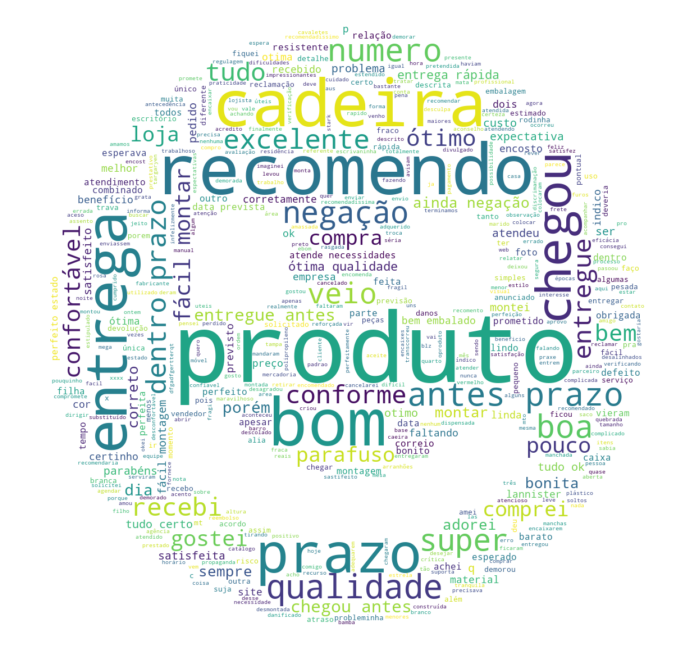

In [39]:
# aplicando nuvem de coment√°rios positivos para Itaquaquecetuba no setor de m√≥veis de escrit√≥rio
unique_string=(" ").join(pal_positiva1['review'])
mask1 = np.array(Image.open("JPEG/positive.jpg"))

word_cloud3 = WordCloud(width = 2000, height = 1000,background_color='white', mask=mask1, max_words=2000, max_font_size=1000,
                      min_font_size=1).generate(unique_string)
plt.figure(figsize=(20,12))
plt.imshow(word_cloud3, interpolation='bilinear')
plt.axis("off")
plt.show()

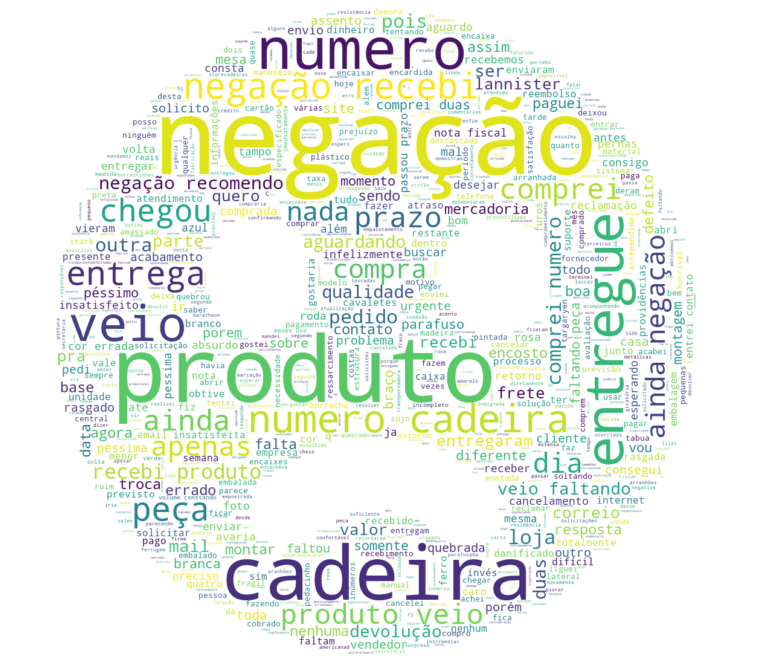

In [40]:
# aplicando nuvem de coment√°rios negativos para Itaquaquecetuba no setor de m√≥veis de escrit√≥rio
unique_string=(" ").join(pal_negativa1['review'])
mask1 = np.array(Image.open("JPEG/negative.jpg"))

word_cloud4 = WordCloud(width = 2000, height = 1000,background_color='white', mask=mask1, max_words=2000, max_font_size=1000,
                      min_font_size=1).generate(unique_string)
plt.figure(figsize=(20,12))
plt.imshow(word_cloud4, interpolation='bilinear')
plt.axis("off")
plt.show()

In [41]:
#Criando r√≥tulos das notas na coluna 'labels'.
# para notas 1,2: valor 0
# a nota 3 ser√° descartada neste momento, pois h√° um misto de sentimentos nela
#as notas 4 e 5 recebem o valor 1, significando, valores positivos.

labels = []

for score in data_itaqua_moveis['review_score']:
  if score > 3:
    labels.append(1)
  else:
    labels.append(0)

data_itaqua_moveis['label'] = labels

<ipython-input-41-d9cf0f6d253a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_itaqua_moveis['label'] = labels


In [42]:
# salvando o dataset processado
data_itaqua_moveis.to_csv('moveis_itaquaquecetuba.csv', index= False, columns= ['review_id', 'review', 'label'])


# Tratando o conte√∫do l√©xico

In [43]:
#trabalhando com o Stopwords
stopwords_pt = stopwords.words("portuguese")
stopwords_pt

['de',
 'a',
 'o',
 'que',
 'e',
 '√©',
 'do',
 'da',
 'em',
 'um',
 'para',
 'com',
 'n√£o',
 'uma',
 'os',
 'no',
 'se',
 'na',
 'por',
 'mais',
 'as',
 'dos',
 'como',
 'mas',
 'ao',
 'ele',
 'das',
 '√†',
 'seu',
 'sua',
 'ou',
 'quando',
 'muito',
 'nos',
 'j√°',
 'eu',
 'tamb√©m',
 's√≥',
 'pelo',
 'pela',
 'at√©',
 'isso',
 'ela',
 'entre',
 'depois',
 'sem',
 'mesmo',
 'aos',
 'seus',
 'quem',
 'nas',
 'me',
 'esse',
 'eles',
 'voc√™',
 'essa',
 'num',
 'nem',
 'suas',
 'meu',
 '√†s',
 'minha',
 'numa',
 'pelos',
 'elas',
 'qual',
 'n√≥s',
 'lhe',
 'deles',
 'essas',
 'esses',
 'pelas',
 'este',
 'dele',
 'tu',
 'te',
 'voc√™s',
 'vos',
 'lhes',
 'meus',
 'minhas',
 'teu',
 'tua',
 'teus',
 'tuas',
 'nosso',
 'nossa',
 'nossos',
 'nossas',
 'dela',
 'delas',
 'esta',
 'estes',
 'estas',
 'aquele',
 'aquela',
 'aqueles',
 'aquelas',
 'isto',
 'aquilo',
 'estou',
 'est√°',
 'estamos',
 'est√£o',
 'estive',
 'esteve',
 'estivemos',
 'estiveram',
 'estava',
 'est√°vamos',
 'estavam

In [44]:
#Como os adv√©rbios 'n√£o' e 'nem' s√£o importantes neste caso do e-commerce,
#vamos retirar essas palavras da lista de stopwords:
stopwords_pt.remove('n√£o')
stopwords_pt.remove('nem')

In [45]:
#Definindo as fun√ß√µes para tratamento do texto
def re_breakline(text_list):
    """
    Args:
    ----------
    text_list: list object with text content to be prepared [type: list]
    """
    
    # Aplicando regex
    return [re.sub('[\n\r]', ' ', r) for r in text_list]

# Criando a lista de coment√°rios das reviews
reviews = list(data['review'].values)

# Aplicando regex
reviews_breakline = re_breakline(reviews)

# atualizando o dataset
data['review'] = reviews_breakline
data


review_id                          order_id  \
3      e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4      f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
9      8670d52e15e00043ae7de4c01cc2fe06  b9bf720beb4ab3728760088589c62129   
12     4b49719c8a200003f700d3d986ea1a19  9d6f15f95d01e79bd1349cc208361f09   
15     3948b09f7c818e2d86c9a546758b2335  e51478e7e277a83743b6f9991dbfa3fb   
...                                 ...                               ...   
99203  5085bc489aa6b58a29c4f922d59ff826  18ed848509774f56cc8c1c0a1903ad7f   
99205  98fffa80dc9acbde7388bef1600f3b15  d398e9c82363c12527f71801bf0e6100   
99208  df5fae90e85354241d5d64a8955b2b09  509b86c65fe4e2ad5b96408cfef9755e   
99221  b3de70c89b1510c4cd3d0649fd302472  55d4004744368f5571d1f590031933e4   
99223  efe49f1d6f951dd88b51e6ccd4cc548f  90531360ecb1eec2a1fbb265a0db0508   

       review_score review_comment_title  \
3                 5                        
4                 5                        
9                 4            recomendo   
12                4                        
15                5      Super recomendo   
...             ...                  ...   
99203             2                        
99205             4                        
99208             5                        
99221             5                        
99223             1                        

                                  review_comment_message  \
3                  Recebi bem antes do prazo estipulado.   
4      Parab√©ns lojas lannister adorei comprar pela I...   
9      aparelho eficiente. no site a marca do aparelh...   
12       Mas um pouco ,travando...pelo valor ta Boa.\r\n   
15     Vendedor confi√°vel, produto ok e entrega antes...   
...                                                  ...   
99203  Tive um problema na entrega em que o correio c...   
99205  para este produto recebi de acordo com a compr...   
99208  Entregou dentro do prazo. O produto chegou em ...   
99221  Excelente mochila, entrega super r√°pida. Super...   
99223  meu produto chegou e ja tenho que devolver, po...   

                                                  review  label  
3                  Recebi bem antes do prazo estipulado.      1  
4       Parab√©ns lojas lannister adorei comprar pela ...      1  
9      recomendo aparelho eficiente. no site a marca ...      1  
12         Mas um pouco ,travando...pelo valor ta Boa.        1  
15     Super recomendo Vendedor confi√°vel, produto ok...      1  
...                                                  ...    ...  
99203   Tive um problema na entrega em que o correio ...      0  
99205   para este produto recebi de acordo com a comp...      1  
99208   Entregou dentro do prazo. O produto chegou em...      1  
99221   Excelente mochila, entrega super r√°pida. Supe...      1  
99223   meu produto chegou e ja tenho que devolver, p...      0  

[38774 rows x 7 columns]

In [46]:
def re_hiperlinks(text_list):
    """
    Args:
    ----------
    text_list: list object with text content to be prepared [type: list]
    """
    
    # Aplicando regex
    pattern = 'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    return [re.sub(pattern, ' link ', r) for r in text_list]

#  atualizando o dataset
reviews_hiperlinks = re_hiperlinks(reviews_breakline)
data['review'] = reviews_hiperlinks
data

review_id                          order_id  \
3      e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4      f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
9      8670d52e15e00043ae7de4c01cc2fe06  b9bf720beb4ab3728760088589c62129   
12     4b49719c8a200003f700d3d986ea1a19  9d6f15f95d01e79bd1349cc208361f09   
15     3948b09f7c818e2d86c9a546758b2335  e51478e7e277a83743b6f9991dbfa3fb   
...                                 ...                               ...   
99203  5085bc489aa6b58a29c4f922d59ff826  18ed848509774f56cc8c1c0a1903ad7f   
99205  98fffa80dc9acbde7388bef1600f3b15  d398e9c82363c12527f71801bf0e6100   
99208  df5fae90e85354241d5d64a8955b2b09  509b86c65fe4e2ad5b96408cfef9755e   
99221  b3de70c89b1510c4cd3d0649fd302472  55d4004744368f5571d1f590031933e4   
99223  efe49f1d6f951dd88b51e6ccd4cc548f  90531360ecb1eec2a1fbb265a0db0508   

       review_score review_comment_title  \
3                 5                        
4                 5                        
9                 4            recomendo   
12                4                        
15                5      Super recomendo   
...             ...                  ...   
99203             2                        
99205             4                        
99208             5                        
99221             5                        
99223             1                        

                                  review_comment_message  \
3                  Recebi bem antes do prazo estipulado.   
4      Parab√©ns lojas lannister adorei comprar pela I...   
9      aparelho eficiente. no site a marca do aparelh...   
12       Mas um pouco ,travando...pelo valor ta Boa.\r\n   
15     Vendedor confi√°vel, produto ok e entrega antes...   
...                                                  ...   
99203  Tive um problema na entrega em que o correio c...   
99205  para este produto recebi de acordo com a compr...   
99208  Entregou dentro do prazo. O produto chegou em ...   
99221  Excelente mochila, entrega super r√°pida. Super...   
99223  meu produto chegou e ja tenho que devolver, po...   

                                                  review  label  
3                  Recebi bem antes do prazo estipulado.      1  
4       Parab√©ns lojas lannister adorei comprar pela ...      1  
9      recomendo aparelho eficiente. no site a marca ...      1  
12         Mas um pouco ,travando...pelo valor ta Boa.        1  
15     Super recomendo Vendedor confi√°vel, produto ok...      1  
...                                                  ...    ...  
99203   Tive um problema na entrega em que o correio ...      0  
99205   para este produto recebi de acordo com a comp...      1  
99208   Entregou dentro do prazo. O produto chegou em...      1  
99221   Excelente mochila, entrega super r√°pida. Supe...      1  
99223   meu produto chegou e ja tenho que devolver, p...      0  

[38774 rows x 7 columns]

In [47]:
def re_dates(text_list):
    """
    Args:
    ----------
    text_list: list object with text content to be prepared [type: list]
    """
    
    # Aplicando regex
    pattern = '([0-2][0-9]|(3)[0-1])(\/|\.)(((0)[0-9])|((1)[0-2]))(\/|\.)\d{2,4}'
    return [re.sub(pattern, ' data ', r) for r in text_list]
# Atualizando o dataset
reviews_dates = re_dates(reviews_hiperlinks)
data['review'] = reviews_dates
data

review_id                          order_id  \
3      e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4      f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
9      8670d52e15e00043ae7de4c01cc2fe06  b9bf720beb4ab3728760088589c62129   
12     4b49719c8a200003f700d3d986ea1a19  9d6f15f95d01e79bd1349cc208361f09   
15     3948b09f7c818e2d86c9a546758b2335  e51478e7e277a83743b6f9991dbfa3fb   
...                                 ...                               ...   
99203  5085bc489aa6b58a29c4f922d59ff826  18ed848509774f56cc8c1c0a1903ad7f   
99205  98fffa80dc9acbde7388bef1600f3b15  d398e9c82363c12527f71801bf0e6100   
99208  df5fae90e85354241d5d64a8955b2b09  509b86c65fe4e2ad5b96408cfef9755e   
99221  b3de70c89b1510c4cd3d0649fd302472  55d4004744368f5571d1f590031933e4   
99223  efe49f1d6f951dd88b51e6ccd4cc548f  90531360ecb1eec2a1fbb265a0db0508   

       review_score review_comment_title  \
3                 5                        
4                 5                        
9                 4            recomendo   
12                4                        
15                5      Super recomendo   
...             ...                  ...   
99203             2                        
99205             4                        
99208             5                        
99221             5                        
99223             1                        

                                  review_comment_message  \
3                  Recebi bem antes do prazo estipulado.   
4      Parab√©ns lojas lannister adorei comprar pela I...   
9      aparelho eficiente. no site a marca do aparelh...   
12       Mas um pouco ,travando...pelo valor ta Boa.\r\n   
15     Vendedor confi√°vel, produto ok e entrega antes...   
...                                                  ...   
99203  Tive um problema na entrega em que o correio c...   
99205  para este produto recebi de acordo com a compr...   
99208  Entregou dentro do prazo. O produto chegou em ...   
99221  Excelente mochila, entrega super r√°pida. Super...   
99223  meu produto chegou e ja tenho que devolver, po...   

                                                  review  label  
3                  Recebi bem antes do prazo estipulado.      1  
4       Parab√©ns lojas lannister adorei comprar pela ...      1  
9      recomendo aparelho eficiente. no site a marca ...      1  
12         Mas um pouco ,travando...pelo valor ta Boa.        1  
15     Super recomendo Vendedor confi√°vel, produto ok...      1  
...                                                  ...    ...  
99203   Tive um problema na entrega em que o correio ...      0  
99205   para este produto recebi de acordo com a comp...      1  
99208   Entregou dentro do prazo. O produto chegou em...      1  
99221   Excelente mochila, entrega super r√°pida. Supe...      1  
99223   meu produto chegou e ja tenho que devolver, p...      0  

[38774 rows x 7 columns]

In [48]:
def re_money(text_list):
    """
    Args:
    ----------
    text_list: list object with text content to be prepared [type: list]
    """
    
    # Aplicando regex
    pattern = '[R]{0,1}\$[ ]{0,}\d+(,|\.)\d+'
    return [re.sub(pattern, ' dinheiro ', r) for r in text_list]
# Aplicando RegEx
reviews_money = re_money(reviews_dates)
data['review'] = reviews_money
data

review_id                          order_id  \
3      e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4      f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
9      8670d52e15e00043ae7de4c01cc2fe06  b9bf720beb4ab3728760088589c62129   
12     4b49719c8a200003f700d3d986ea1a19  9d6f15f95d01e79bd1349cc208361f09   
15     3948b09f7c818e2d86c9a546758b2335  e51478e7e277a83743b6f9991dbfa3fb   
...                                 ...                               ...   
99203  5085bc489aa6b58a29c4f922d59ff826  18ed848509774f56cc8c1c0a1903ad7f   
99205  98fffa80dc9acbde7388bef1600f3b15  d398e9c82363c12527f71801bf0e6100   
99208  df5fae90e85354241d5d64a8955b2b09  509b86c65fe4e2ad5b96408cfef9755e   
99221  b3de70c89b1510c4cd3d0649fd302472  55d4004744368f5571d1f590031933e4   
99223  efe49f1d6f951dd88b51e6ccd4cc548f  90531360ecb1eec2a1fbb265a0db0508   

       review_score review_comment_title  \
3                 5                        
4                 5                        
9                 4            recomendo   
12                4                        
15                5      Super recomendo   
...             ...                  ...   
99203             2                        
99205             4                        
99208             5                        
99221             5                        
99223             1                        

                                  review_comment_message  \
3                  Recebi bem antes do prazo estipulado.   
4      Parab√©ns lojas lannister adorei comprar pela I...   
9      aparelho eficiente. no site a marca do aparelh...   
12       Mas um pouco ,travando...pelo valor ta Boa.\r\n   
15     Vendedor confi√°vel, produto ok e entrega antes...   
...                                                  ...   
99203  Tive um problema na entrega em que o correio c...   
99205  para este produto recebi de acordo com a compr...   
99208  Entregou dentro do prazo. O produto chegou em ...   
99221  Excelente mochila, entrega super r√°pida. Super...   
99223  meu produto chegou e ja tenho que devolver, po...   

                                                  review  label  
3                  Recebi bem antes do prazo estipulado.      1  
4       Parab√©ns lojas lannister adorei comprar pela ...      1  
9      recomendo aparelho eficiente. no site a marca ...      1  
12         Mas um pouco ,travando...pelo valor ta Boa.        1  
15     Super recomendo Vendedor confi√°vel, produto ok...      1  
...                                                  ...    ...  
99203   Tive um problema na entrega em que o correio ...      0  
99205   para este produto recebi de acordo com a comp...      1  
99208   Entregou dentro do prazo. O produto chegou em...      1  
99221   Excelente mochila, entrega super r√°pida. Supe...      1  
99223   meu produto chegou e ja tenho que devolver, p...      0  

[38774 rows x 7 columns]

In [49]:
def re_numbers(text_list):
    """
    Args:
    ----------
    text_series: list object with text content to be prepared [type: list]
    """
    
    # Aplicando regex
    return [re.sub('[0-9]+', ' numero ', r) for r in text_list]
# Atualizando o dataset
reviews_numbers = re_numbers(reviews_money)
data['review'] = reviews_numbers
data

review_id                          order_id  \
3      e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4      f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
9      8670d52e15e00043ae7de4c01cc2fe06  b9bf720beb4ab3728760088589c62129   
12     4b49719c8a200003f700d3d986ea1a19  9d6f15f95d01e79bd1349cc208361f09   
15     3948b09f7c818e2d86c9a546758b2335  e51478e7e277a83743b6f9991dbfa3fb   
...                                 ...                               ...   
99203  5085bc489aa6b58a29c4f922d59ff826  18ed848509774f56cc8c1c0a1903ad7f   
99205  98fffa80dc9acbde7388bef1600f3b15  d398e9c82363c12527f71801bf0e6100   
99208  df5fae90e85354241d5d64a8955b2b09  509b86c65fe4e2ad5b96408cfef9755e   
99221  b3de70c89b1510c4cd3d0649fd302472  55d4004744368f5571d1f590031933e4   
99223  efe49f1d6f951dd88b51e6ccd4cc548f  90531360ecb1eec2a1fbb265a0db0508   

       review_score review_comment_title  \
3                 5                        
4                 5                        
9                 4            recomendo   
12                4                        
15                5      Super recomendo   
...             ...                  ...   
99203             2                        
99205             4                        
99208             5                        
99221             5                        
99223             1                        

                                  review_comment_message  \
3                  Recebi bem antes do prazo estipulado.   
4      Parab√©ns lojas lannister adorei comprar pela I...   
9      aparelho eficiente. no site a marca do aparelh...   
12       Mas um pouco ,travando...pelo valor ta Boa.\r\n   
15     Vendedor confi√°vel, produto ok e entrega antes...   
...                                                  ...   
99203  Tive um problema na entrega em que o correio c...   
99205  para este produto recebi de acordo com a compr...   
99208  Entregou dentro do prazo. O produto chegou em ...   
99221  Excelente mochila, entrega super r√°pida. Super...   
99223  meu produto chegou e ja tenho que devolver, po...   

                                                  review  label  
3                  Recebi bem antes do prazo estipulado.      1  
4       Parab√©ns lojas lannister adorei comprar pela ...      1  
9      recomendo aparelho eficiente. no site a marca ...      1  
12         Mas um pouco ,travando...pelo valor ta Boa.        1  
15     Super recomendo Vendedor confi√°vel, produto ok...      1  
...                                                  ...    ...  
99203   Tive um problema na entrega em que o correio ...      0  
99205   para este produto recebi de acordo com a comp...      1  
99208   Entregou dentro do prazo. O produto chegou em...      1  
99221   Excelente mochila, entrega super r√°pida. Supe...      1  
99223   meu produto chegou e ja tenho que devolver, p...      0  

[38774 rows x 7 columns]

In [50]:
def re_negation(text_list):
    """
    Args:
    ----------
    text_series: list object with text content to be prepared [type: list]
    """
    
    # AppAplicando regex
    return [re.sub('([nN][√£√ÉaA][oO]|[√±√ë]| [nN] )', ' nega√ß√£o ', r) for r in text_list]
#Atualizando o dataset
reviews_negation = re_negation(reviews_numbers)
data['review'] = reviews_negation
data

review_id                          order_id  \
3      e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4      f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
9      8670d52e15e00043ae7de4c01cc2fe06  b9bf720beb4ab3728760088589c62129   
12     4b49719c8a200003f700d3d986ea1a19  9d6f15f95d01e79bd1349cc208361f09   
15     3948b09f7c818e2d86c9a546758b2335  e51478e7e277a83743b6f9991dbfa3fb   
...                                 ...                               ...   
99203  5085bc489aa6b58a29c4f922d59ff826  18ed848509774f56cc8c1c0a1903ad7f   
99205  98fffa80dc9acbde7388bef1600f3b15  d398e9c82363c12527f71801bf0e6100   
99208  df5fae90e85354241d5d64a8955b2b09  509b86c65fe4e2ad5b96408cfef9755e   
99221  b3de70c89b1510c4cd3d0649fd302472  55d4004744368f5571d1f590031933e4   
99223  efe49f1d6f951dd88b51e6ccd4cc548f  90531360ecb1eec2a1fbb265a0db0508   

       review_score review_comment_title  \
3                 5                        
4                 5                        
9                 4            recomendo   
12                4                        
15                5      Super recomendo   
...             ...                  ...   
99203             2                        
99205             4                        
99208             5                        
99221             5                        
99223             1                        

                                  review_comment_message  \
3                  Recebi bem antes do prazo estipulado.   
4      Parab√©ns lojas lannister adorei comprar pela I...   
9      aparelho eficiente. no site a marca do aparelh...   
12       Mas um pouco ,travando...pelo valor ta Boa.\r\n   
15     Vendedor confi√°vel, produto ok e entrega antes...   
...                                                  ...   
99203  Tive um problema na entrega em que o correio c...   
99205  para este produto recebi de acordo com a compr...   
99208  Entregou dentro do prazo. O produto chegou em ...   
99221  Excelente mochila, entrega super r√°pida. Super...   
99223  meu produto chegou e ja tenho que devolver, po...   

                                                  review  label  
3                  Recebi bem antes do prazo estipulado.      1  
4       Parab√©ns lojas lannister adorei comprar pela ...      1  
9      recomendo aparelho eficiente. no site a marca ...      1  
12         Mas um pouco ,travando...pelo valor ta Boa.        1  
15     Super recomendo Vendedor confi√°vel, produto ok...      1  
...                                                  ...    ...  
99203   Tive um problema na entrega em que o correio ...      0  
99205   para este produto recebi de acordo com a comp...      1  
99208   Entregou dentro do prazo. O produto chegou em...      1  
99221   Excelente mochila, entrega super r√°pida. Supe...      1  
99223   meu produto chegou e ja tenho que devolver, p...      0  

[38774 rows x 7 columns]

In [51]:
def re_special_chars(text_list):
    """
    Args:
    ----------
    text_series: list object with text content to be prepared [type: list]
    """
    
    # Aplicando regex
    return [re.sub('\W', ' ', r) for r in text_list]

# Atualizando o dataset
reviews_special_chars = re_special_chars(reviews_negation)
data['review'] = reviews_special_chars
data

review_id                          order_id  \
3      e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4      f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
9      8670d52e15e00043ae7de4c01cc2fe06  b9bf720beb4ab3728760088589c62129   
12     4b49719c8a200003f700d3d986ea1a19  9d6f15f95d01e79bd1349cc208361f09   
15     3948b09f7c818e2d86c9a546758b2335  e51478e7e277a83743b6f9991dbfa3fb   
...                                 ...                               ...   
99203  5085bc489aa6b58a29c4f922d59ff826  18ed848509774f56cc8c1c0a1903ad7f   
99205  98fffa80dc9acbde7388bef1600f3b15  d398e9c82363c12527f71801bf0e6100   
99208  df5fae90e85354241d5d64a8955b2b09  509b86c65fe4e2ad5b96408cfef9755e   
99221  b3de70c89b1510c4cd3d0649fd302472  55d4004744368f5571d1f590031933e4   
99223  efe49f1d6f951dd88b51e6ccd4cc548f  90531360ecb1eec2a1fbb265a0db0508   

       review_score review_comment_title  \
3                 5                        
4                 5                        
9                 4            recomendo   
12                4                        
15                5      Super recomendo   
...             ...                  ...   
99203             2                        
99205             4                        
99208             5                        
99221             5                        
99223             1                        

                                  review_comment_message  \
3                  Recebi bem antes do prazo estipulado.   
4      Parab√©ns lojas lannister adorei comprar pela I...   
9      aparelho eficiente. no site a marca do aparelh...   
12       Mas um pouco ,travando...pelo valor ta Boa.\r\n   
15     Vendedor confi√°vel, produto ok e entrega antes...   
...                                                  ...   
99203  Tive um problema na entrega em que o correio c...   
99205  para este produto recebi de acordo com a compr...   
99208  Entregou dentro do prazo. O produto chegou em ...   
99221  Excelente mochila, entrega super r√°pida. Super...   
99223  meu produto chegou e ja tenho que devolver, po...   

                                                  review  label  
3                  Recebi bem antes do prazo estipulado       1  
4       Parab√©ns lojas lannister adorei comprar pela ...      1  
9      recomendo aparelho eficiente  no site a marca ...      1  
12         Mas um pouco  travando   pelo valor ta Boa         1  
15     Super recomendo Vendedor confi√°vel  produto ok...      1  
...                                                  ...    ...  
99203   Tive um problema na entrega em que o correio ...      0  
99205   para este produto recebi de acordo com a comp...      1  
99208   Entregou dentro do prazo  O produto chegou em...      1  
99221   Excelente mochila  entrega super r√°pida  Supe...      1  
99223   meu produto chegou e ja tenho que devolver  p...      0  

[38774 rows x 7 columns]

In [52]:
def re_whitespaces(text_list):
    """
    Args:
    ----------
    text_series: list object with text content to be prepared [type: list]
    """
    
    # Apicando regex
    white_spaces = [re.sub('\s+', ' ', r) for r in text_list]
    white_spaces_end = [re.sub('[ \t]+$', '', r) for r in white_spaces]
    return white_spaces_end

# Atualizando o dataset
reviews_whitespaces = re_whitespaces(reviews_special_chars)
data['review'] = reviews_whitespaces
data

review_id                          order_id  \
3      e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4      f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
9      8670d52e15e00043ae7de4c01cc2fe06  b9bf720beb4ab3728760088589c62129   
12     4b49719c8a200003f700d3d986ea1a19  9d6f15f95d01e79bd1349cc208361f09   
15     3948b09f7c818e2d86c9a546758b2335  e51478e7e277a83743b6f9991dbfa3fb   
...                                 ...                               ...   
99203  5085bc489aa6b58a29c4f922d59ff826  18ed848509774f56cc8c1c0a1903ad7f   
99205  98fffa80dc9acbde7388bef1600f3b15  d398e9c82363c12527f71801bf0e6100   
99208  df5fae90e85354241d5d64a8955b2b09  509b86c65fe4e2ad5b96408cfef9755e   
99221  b3de70c89b1510c4cd3d0649fd302472  55d4004744368f5571d1f590031933e4   
99223  efe49f1d6f951dd88b51e6ccd4cc548f  90531360ecb1eec2a1fbb265a0db0508   

       review_score review_comment_title  \
3                 5                        
4                 5                        
9                 4            recomendo   
12                4                        
15                5      Super recomendo   
...             ...                  ...   
99203             2                        
99205             4                        
99208             5                        
99221             5                        
99223             1                        

                                  review_comment_message  \
3                  Recebi bem antes do prazo estipulado.   
4      Parab√©ns lojas lannister adorei comprar pela I...   
9      aparelho eficiente. no site a marca do aparelh...   
12       Mas um pouco ,travando...pelo valor ta Boa.\r\n   
15     Vendedor confi√°vel, produto ok e entrega antes...   
...                                                  ...   
99203  Tive um problema na entrega em que o correio c...   
99205  para este produto recebi de acordo com a compr...   
99208  Entregou dentro do prazo. O produto chegou em ...   
99221  Excelente mochila, entrega super r√°pida. Super...   
99223  meu produto chegou e ja tenho que devolver, po...   

                                                  review  label  
3                   Recebi bem antes do prazo estipulado      1  
4       Parab√©ns lojas lannister adorei comprar pela ...      1  
9      recomendo aparelho eficiente no site a marca d...      1  
12               Mas um pouco travando pelo valor ta Boa      1  
15     Super recomendo Vendedor confi√°vel produto ok ...      1  
...                                                  ...    ...  
99203   Tive um problema na entrega em que o correio ...      0  
99205   para este produto recebi de acordo com a comp...      1  
99208   Entregou dentro do prazo O produto chegou em ...      1  
99221   Excelente mochila entrega super r√°pida Super ...      1  
99223   meu produto chegou e ja tenho que devolver po...      0  

[38774 rows x 7 columns]

In [53]:
# Fun√ß√£o para remover o stopwords e transfomar em caixa baixa

def stopwords_removal(text, cached_stopwords=stopwords.words('portuguese')):
    """
    Args:
    ----------
    text: list object where the stopwords will be removed [type: list]
    cached_stopwords: stopwords to be applied on the process [type: list, default: stopwords.words('portuguese')]
    """
    
    return [c.lower() for c in text.split() if c.lower() not in cached_stopwords]

# Aplicando e atualizando o dataset
reviews_stopwords = [' '.join(stopwords_removal(review)) for review in reviews_whitespaces]
data['review'] = reviews_stopwords
data

review_id                          order_id  \
3      e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4      f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
9      8670d52e15e00043ae7de4c01cc2fe06  b9bf720beb4ab3728760088589c62129   
12     4b49719c8a200003f700d3d986ea1a19  9d6f15f95d01e79bd1349cc208361f09   
15     3948b09f7c818e2d86c9a546758b2335  e51478e7e277a83743b6f9991dbfa3fb   
...                                 ...                               ...   
99203  5085bc489aa6b58a29c4f922d59ff826  18ed848509774f56cc8c1c0a1903ad7f   
99205  98fffa80dc9acbde7388bef1600f3b15  d398e9c82363c12527f71801bf0e6100   
99208  df5fae90e85354241d5d64a8955b2b09  509b86c65fe4e2ad5b96408cfef9755e   
99221  b3de70c89b1510c4cd3d0649fd302472  55d4004744368f5571d1f590031933e4   
99223  efe49f1d6f951dd88b51e6ccd4cc548f  90531360ecb1eec2a1fbb265a0db0508   

       review_score review_comment_title  \
3                 5                        
4                 5                        
9                 4            recomendo   
12                4                        
15                5      Super recomendo   
...             ...                  ...   
99203             2                        
99205             4                        
99208             5                        
99221             5                        
99223             1                        

                                  review_comment_message  \
3                  Recebi bem antes do prazo estipulado.   
4      Parab√©ns lojas lannister adorei comprar pela I...   
9      aparelho eficiente. no site a marca do aparelh...   
12       Mas um pouco ,travando...pelo valor ta Boa.\r\n   
15     Vendedor confi√°vel, produto ok e entrega antes...   
...                                                  ...   
99203  Tive um problema na entrega em que o correio c...   
99205  para este produto recebi de acordo com a compr...   
99208  Entregou dentro do prazo. O produto chegou em ...   
99221  Excelente mochila, entrega super r√°pida. Super...   
99223  meu produto chegou e ja tenho que devolver, po...   

                                                  review  label  
3                      recebi bem antes prazo estipulado      1  
4      parab√©ns lojas lannister adorei comprar intern...      1  
9      recomendo aparelho eficiente site marca aparel...      1  
12                           pouco travando valor ta boa      1  
15     super recomendo vendedor confi√°vel produto ok ...      1  
...                                                  ...    ...  
99203  problema entrega correio colocou site entregue...      0  
99205             produto recebi acordo compra realizada      1  
99208  entregou dentro prazo produto chegou condi√ß√µes...      1  
99221  excelente mochila entrega super r√°pida super r...      1  
99223  produto chegou ja devolver pois defeito nega√ß√£...      0  

[38774 rows x 7 columns]

In [54]:
#Separando palavras
pal_positiva = data[data['review_score'] >3]
pal_positiva
pal_negativa = data[data['review_score'] <3]
pal_negativa

review_id                          order_id  \
16     9314d6f9799f5bfba510cc7bcd468c01  0dacf04c5ad59fd5a0cc1faa07c34e39   
19     373cbeecea8286a2b66c97b1b157ec46  583174fbe37d3d5f0d6661be3aad1786   
29     2c5e27fc178bde7ac173c9c62c31b070  0ce9a24111d850192a933fcaab6fbad3   
32     58044bca115705a48fe0e00a21390c54  68e55ca79d04a79f20d4bfc0146f4b66   
39     9fd59cd04b42f600df9f25e54082a8d1  3c314f50bc654f3c4e317b055681dff9   
...                                 ...                               ...   
99155  2fc8295a24978092328d3a329d22940e  e809c167a9cfd31aee1293abe8995065   
99169  3450ec3bbabeb09a08b00fc72da87a30  c46f950813dd2dd9bab4188dceb83175   
99200  2ee221b28e5b6fceffac59487ed39348  f2d12dd37eaef72ed7b1186b2edefbcd   
99203  5085bc489aa6b58a29c4f922d59ff826  18ed848509774f56cc8c1c0a1903ad7f   
99223  efe49f1d6f951dd88b51e6ccd4cc548f  90531360ecb1eec2a1fbb265a0db0508   

       review_score     review_comment_title  \
16                2                            
19                1  N√£o chegou meu produto    
29                1                            
32                1                            
39                1                            
...             ...                      ...   
99155             1                            
99169             1                            
99200             2           Foto enganosa    
99203             2                            
99223             1                            

                                  review_comment_message  \
16     GOSTARIA DE SABER O QUE HOUVE, SEMPRE RECEBI E...   
19                                               P√©ssimo   
29                   N√£o gostei ! Comprei gato por lebre   
32     Sempre compro pela Internet e a entrega ocorre...   
39                          Nada de chegar o meu pedido.   
...                                                  ...   
99155  Eu recebi o seguinte email e preciso saber com...   
99169  Boa tarde. \r\nN√£o recebo todos os produtos fa...   
99200  Foto muito diferente principalmente a graninha...   
99203  Tive um problema na entrega em que o correio c...   
99223  meu produto chegou e ja tenho que devolver, po...   

                                                  review  label  
16     gostaria saber sempre recebi compra agora decp...      0  
19                        nega√ß√£o chegou produto p√©ssimo      0  
29                     nega√ß√£o gostei comprei gato lebre      0  
32     sempre compro internet entrega ocorre antes pr...      0  
39                                    nada chegar pedido      0  
...                                                  ...    ...  
99155  recebi seguinte email preciso saber recuperar ...      0  
99169  boa tarde nega√ß√£o recebo todos produtos falta ...      0  
99200  foto enganosa foto diferente principalmente gr...      0  
99203  problema entrega correio colocou site entregue...      0  
99223  produto chegou ja devolver pois defeito nega√ß√£...      0  

[10861 rows x 7 columns]

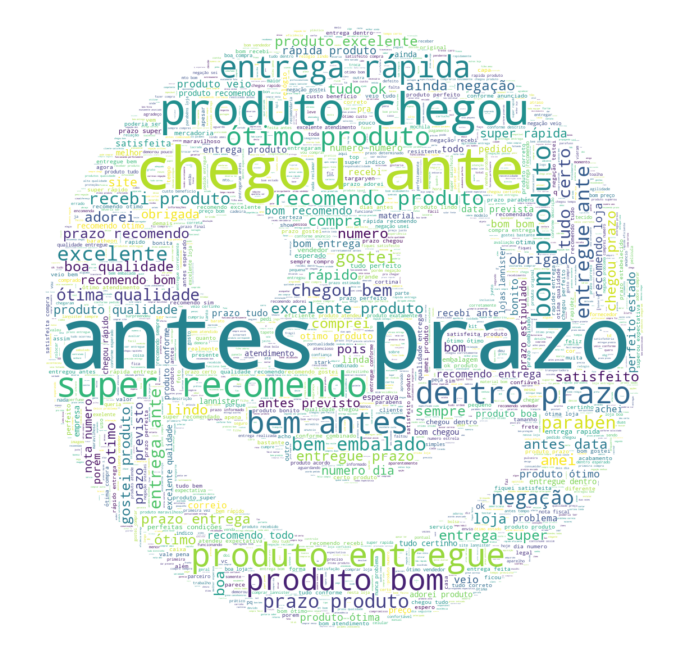

In [55]:
# Gera√ß√£o de nuvem de palavras positivas de vendas em geral
unique_string=(" ").join(pal_positiva['review'])
mask1 = np.array(Image.open("JPEG\positive.jpg"))

word_cloud = WordCloud(width = 2000, height = 1000,background_color='white', mask=mask1, max_words=2000, max_font_size=1000,
                      min_font_size=1).generate(unique_string)
plt.figure(figsize=(20,12))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

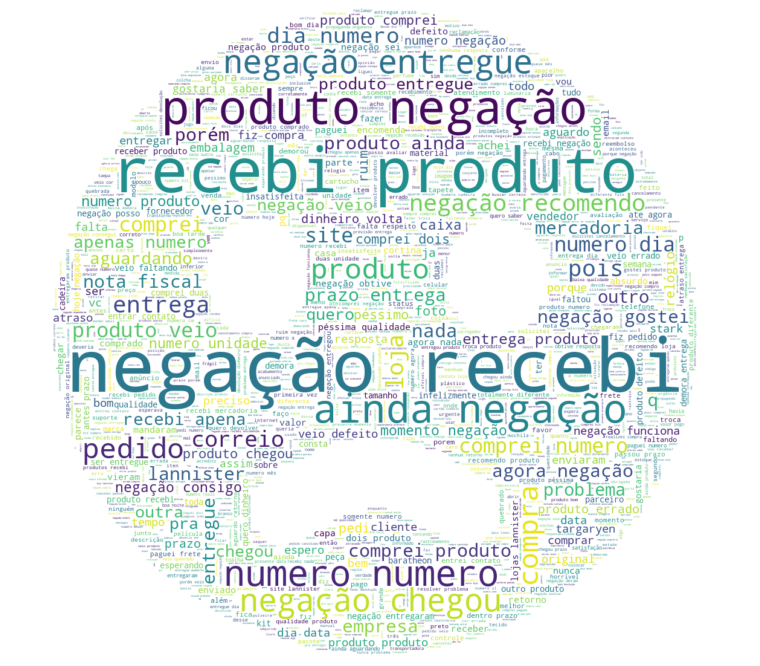

In [56]:
# Gera√ß√£o de nuvem de palavras negativas de vendas em geral

unique_string=(" ").join(pal_negativa['review'])
mask2 = np.array(Image.open("JPEG/negative.jpg"))

word_cloud2 = WordCloud(width = 2000, height = 1000,background_color='white', mask=mask2, max_words=2000, max_font_size=1000).generate(unique_string)
plt.figure(figsize=(20,12))
plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

In [60]:
# Fun√ß√£o para stemmer
def stemming_process(text, stemmer=RSLPStemmer()):
    """
    Args:
    ----------
    text: list object where the stopwords will be removed [type: list]
    stemmer: type of stemmer to be applied [type: class, default: RSLPStemmer()]
    """
    
    return [stemmer.stem(c) for c in text.split()]

# Aplicando o Stemmer
reviews_stemmer = [' '.join(stemming_process(review)) for review in reviews_stopwords]
data['review'] = reviews_stemmer
data

review_id                          order_id  \
3      e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4      f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
9      8670d52e15e00043ae7de4c01cc2fe06  b9bf720beb4ab3728760088589c62129   
12     4b49719c8a200003f700d3d986ea1a19  9d6f15f95d01e79bd1349cc208361f09   
15     3948b09f7c818e2d86c9a546758b2335  e51478e7e277a83743b6f9991dbfa3fb   
...                                 ...                               ...   
99203  5085bc489aa6b58a29c4f922d59ff826  18ed848509774f56cc8c1c0a1903ad7f   
99205  98fffa80dc9acbde7388bef1600f3b15  d398e9c82363c12527f71801bf0e6100   
99208  df5fae90e85354241d5d64a8955b2b09  509b86c65fe4e2ad5b96408cfef9755e   
99221  b3de70c89b1510c4cd3d0649fd302472  55d4004744368f5571d1f590031933e4   
99223  efe49f1d6f951dd88b51e6ccd4cc548f  90531360ecb1eec2a1fbb265a0db0508   

       review_score review_comment_title  \
3                 5                        
4                 5                        
9                 4            recomendo   
12                4                        
15                5      Super recomendo   
...             ...                  ...   
99203             2                        
99205             4                        
99208             5                        
99221             5                        
99223             1                        

                                  review_comment_message  \
3                  Recebi bem antes do prazo estipulado.   
4      Parab√©ns lojas lannister adorei comprar pela I...   
9      aparelho eficiente. no site a marca do aparelh...   
12       Mas um pouco ,travando...pelo valor ta Boa.\r\n   
15     Vendedor confi√°vel, produto ok e entrega antes...   
...                                                  ...   
99203  Tive um problema na entrega em que o correio c...   
99205  para este produto recebi de acordo com a compr...   
99208  Entregou dentro do prazo. O produto chegou em ...   
99221  Excelente mochila, entrega super r√°pida. Super...   
99223  meu produto chegou e ja tenho que devolver, po...   

                                                  review  label  
3                             receb bem ant praz estipul      1  
4      parab√©m loj lannist ador compr internet segur ...      1  
9      recom aparelh efici sit marc aparelh impress n...      1  
12                                  pouc trav val ta boa      1  
15        sup recom vend confi produt ok entreg ant praz      1  
...                                                  ...    ...  
99203  problem entreg correi coloc sit entreg dia num...      0  
99205                    produt receb acord compr realiz      1  
99208  entreg dentr praz produt cheg cond perfeit sat...      1  
99221        excel mochil entreg sup r√°pid sup recom loj      1  
99223    produt cheg ja devolv poi defeit neg segur carg      0  

[38774 rows x 7 columns]

In [79]:
#verificando valores nulos gerados
data[data['review'] == '']

review_id  review_score review_comment_title  \
297    2b4a570df87cd63b232272dd9dcac0cf             5                        
939    8f965d010b3119d9962e091de3425fb9             4                        
2383   a359af00b3fc204a898ad979ebac38ca             1                        
3337   64a897235b857e3e09aa49eee59d0b55             5                        
3359   42efe873e1d493d3a3a0e4f9b8ed7bee             4                        
...                                 ...           ...                  ...   
93970  480bc69dac211c3ae1a44533394b7d5c             4                        
94202  86cb15d4a00e8a6ff94f8a30af32d99b             5                        
94778  014f70270fa59804f14eb3df2ca690d2             5                        
96770  47850e2adbd18f61f2af4af9b7656198             5                        
98032  f004d8b3a2ff22e3c030285842cf629a             5                *****   

         review_comment_message review  label  
297                           A             1  
939         *******************             1  
2383                          A             0  
3337                        . .             1  
3359                         **             1  
...                         ...    ...    ...  
93970                       ...             1  
94202                         .             1  
94778  ........................             1  
96770                    üëçüèªüëåüèªüëèüèª             1  
98032                                       1  

[137 rows x 6 columns]

In [61]:
data = data[data['review'] != '']

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38637 entries, 3 to 99223
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   review_id               38637 non-null  object
 1   order_id                38637 non-null  object
 2   review_score            38637 non-null  int64 
 3   review_comment_title    38637 non-null  object
 4   review_comment_message  38637 non-null  object
 5   review                  38637 non-null  object
 6   label                   38637 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 2.4+ MB


In [63]:
# salvando o dataset processado
data.to_csv('olist_preprocessado.csv', index= False, columns= ['review_id', 'review', 'label'])

In [64]:
filtro1 = data[['review_id', 'review', 'label']]

In [65]:
filtro1.to_parquet('olist_preprocessado.parquet', index= False)

In [85]:
#importando as bibliotecas necess√°rias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

import re, nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import SnowballStemmer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score
import pickle

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38637 entries, 3 to 99223
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   review_id               38637 non-null  object
 1   order_id                38637 non-null  object
 2   review_score            38637 non-null  int64 
 3   review_comment_title    38637 non-null  object
 4   review_comment_message  38637 non-null  object
 5   review                  38637 non-null  object
 6   label                   38637 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 2.4+ MB


In [87]:
#Usando trigrams(coment√°rio)
co = CountVectorizer(ngram_range=(3,3))
counts = co.fit_transform(data['review'])
important_trigrams = pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False).head(50)
important_trigrams

0
entreg ant praz      1226
cheg ant praz        1173
neg receb produt     1152
bem ant praz          692
aind neg receb        511
produt cheg ant       463
cheg bem ant          429
produt entreg ant     424
entreg dentr praz     388
produt neg entreg     365
entreg sup r√°pid      364
dia numer numer       362
ant praz previst      281
produt √≥tim qual      276
entreg bem ant        258
ant praz produt       237
produt entreg praz    236
receb ant praz        236
produt boa qual       230
ant dat prev          208
entreg r√°pid produt   198
produt neg cheg       194
produt aind neg       190
ant praz recom        183
cheg dentr praz       177
ant praz estipul      176
produt cheg bem       165
aind neg cheg         162
numer numer numer     157
sup recom produt      146
receb produt ant      144
produt cheg praz      141
neg entreg produt     137
produt ant praz       133
cheg ant previst      132
produt entreg dentr   129
produt excel qual     126
receb produt neg      121
produt bem embal      121
praz bem embal        120
√≥tim produt entreg    119
aind neg entreg       115
moment neg receb      114
agor neg receb        111
produt bom entreg     106
ant praz tud          102
receb apen numer      102
ant praz perfeit       99
entreg dia numer       97
cheg ant dat           97

In [88]:
#Criando a maquina preditiva  a partir do coment√°rio
co_counts = CountVectorizer(ngram_range=(1,4))

co_data = co_counts.fit_transform(data['review'])
co_data

<38637x395227 sparse matrix of type '<class 'numpy.int64'>'
	with 909384 stored elements in Compressed Sparse Row format>

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier 


from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold


X = co_data
y = data['label']

lista_de_medidas = ['accuracy', 'recall', 'precision', 'balanced_accuracy', 'f1']
nome_das_medidas = ['acur√°cia', 'sensibilidade', 'precis√£o', 'efici√™ncia', 'f1-score']

lista_de_modelos = [LogisticRegression(),
                        DecisionTreeClassifier(max_depth = 3),
                        DecisionTreeClassifier(max_depth = 5),
                        DecisionTreeClassifier(max_depth = 7),
                        KNeighborsClassifier(n_neighbors = 5),
                        KNeighborsClassifier(n_neighbors = 15),
                        KNeighborsClassifier(n_neighbors = 25),
                        BaggingClassifier(),
                        RandomForestClassifier(n_estimators=50, max_depth = 5),
                        RandomForestClassifier(n_estimators=50, max_depth = 7),
                        RandomForestClassifier(n_estimators=100, max_depth = 5),
                        RandomForestClassifier(n_estimators=100, max_depth = 7)]

nome_dos_modelos = ['Regress√£o Log√≠stica',
                        '√Årvore (prof = 3)',
                        '√Årvore (prof = 5)',
                        '√Årvore (prof = 7)',
                        '5-NN',
                        '15-NN',
                        '25-NN',
                        'Bagging',
                        'Random Forest (arvs = 50, prof = 5)',
                        'Random Forest (arvs = 50, prof = 7)',
                        'Random Forest (arvs = 100, prof = 5)', 
                        'Random Forest (arvs = 100, prof = 7)']

resultados0 = {}

validacao = StratifiedKFold(n_splits = 10)


for i in range(len(lista_de_modelos)):
    print('Rodando modelo: ' + nome_dos_modelos[i])
    accs_vc = cross_validate(lista_de_modelos[i], X, y, cv = validacao, scoring = lista_de_medidas)

    acc = accs_vc['test_accuracy'].mean()
    sen = accs_vc['test_recall'].mean()
    vpp = accs_vc['test_precision'].mean()
    bac = accs_vc['test_balanced_accuracy'].mean()
    f1s = accs_vc['test_f1'].mean()

    resultados0[nome_dos_modelos[i]] = [acc, sen, vpp, bac, f1s]
    
resultados = pd.DataFrame(resultados0, index = nome_das_medidas).T

Rodando modelo: Regress√£o Log√≠stica


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Rodando modelo: √Årvore (prof = 3)
Rodando modelo: √Årvore (prof = 5)


# ngram Geral

In [89]:
transformacao_final = data[['review_score', 'review']]

In [90]:
transformacao_final

review_score                                             review
3                 5                         receb bem ant praz estipul
4                 5  parab√©m loj lannist ador compr internet segur ...
9                 4  recom aparelh efici sit marc aparelh impress n...
12                4                               pouc trav val ta boa
15                5     sup recom vend confi produt ok entreg ant praz
...             ...                                                ...
99203             2  problem entreg correi coloc sit entreg dia num...
99205             4                    produt receb acord compr realiz
99208             5  entreg dentr praz produt cheg cond perfeit sat...
99221             5        excel mochil entreg sup r√°pid sup recom loj
99223             1    produt cheg ja devolv poi defeit neg segur carg

[38637 rows x 2 columns]

In [91]:
# Labelling data
score_map = {
    1: 'negativo',
    2: 'negativo',
    4: 'positivo',
    5: 'positivo'
}
transformacao_final['sentiment_label'] = transformacao_final['review_score'].map(score_map)

# Verifying results
fig, ax = plt.subplots(figsize=(7, 7))
%matplotlib inline

<ipython-input-91-c2255cbaeb3e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transformacao_final['sentiment_label'] = transformacao_final['review_score'].map(score_map)


In [92]:
def ngrams_count(corpus, ngram_range, n=-1, cached_stopwords=stopwords.words('portuguese')):
    """
    Args
    ----------
    corpus: text to be analysed [type: pd.DataFrame]
    ngram_range: type of n gram to be used on analysis [type: tuple]
    n: top limit of ngrams to be shown [type: int, default: -1]
    """
    
    # Using CountVectorizer to build a bag of words using the given corpus
    vectorizer = CountVectorizer(stop_words=cached_stopwords, ngram_range=ngram_range).fit(corpus)
    bag_of_words = vectorizer.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    total_list = words_freq[:n]
    
    # Returning a DataFrame with the ngrams count
    count_df = pd.DataFrame(total_list, columns=['ngram', 'count'])
    return count_df

In [93]:
# Splitting the corpus into positive and negative comments
positive_comments = transformacao_final.query('sentiment_label == "positivo"')['review']
negative_comments = transformacao_final.query('sentiment_label == "negativo"')['review']

# Extracting the top 10 unigrams by sentiment
unigrams_pos = ngrams_count(positive_comments, (1, 1), 10)
unigrams_neg = ngrams_count(negative_comments, (1, 1), 10)

# Extracting the top 10 unigrams by sentiment
bigrams_pos = ngrams_count(positive_comments, (2, 2), 10)
bigrams_neg = ngrams_count(negative_comments, (2, 2), 10)

# Extracting the top 10 unigrams by sentiment
trigrams_pos = ngrams_count(positive_comments, (3, 3), 10)
trigrams_neg = ngrams_count(negative_comments, (3, 3), 10)

<AxesSubplot:xlabel='count', ylabel='ngram'>

Text(0.5, 1.0, 'Top Unigrams on Positive Comments')

Text(0, 0.5, '')

Text(0.5, 0, '')

<AxesSubplot:xlabel='count', ylabel='ngram'>

Text(0.5, 1.0, 'Top Unigrams on Negative Comments')

Text(0, 0.5, '')

Text(0.5, 0, '')

<AxesSubplot:xlabel='count', ylabel='ngram'>

Text(0.5, 1.0, 'Top Bigrams on Positive Comments')

Text(0, 0.5, '')

Text(0.5, 0, '')

<AxesSubplot:xlabel='count', ylabel='ngram'>

Text(0.5, 1.0, 'Top Bigrams on Negative Comments')

Text(0, 0.5, '')

Text(0.5, 0, '')

<AxesSubplot:xlabel='count', ylabel='ngram'>

Text(0.5, 1.0, 'Top Trigrams on Positive Comments')

Text(0, 0.5, '')

Text(0.5, 0, '')

<AxesSubplot:xlabel='count', ylabel='ngram'>

Text(0.5, 1.0, 'Top Trigrams on Negative Comments')

Text(0, 0.5, '')

Text(0.5, 0, '')

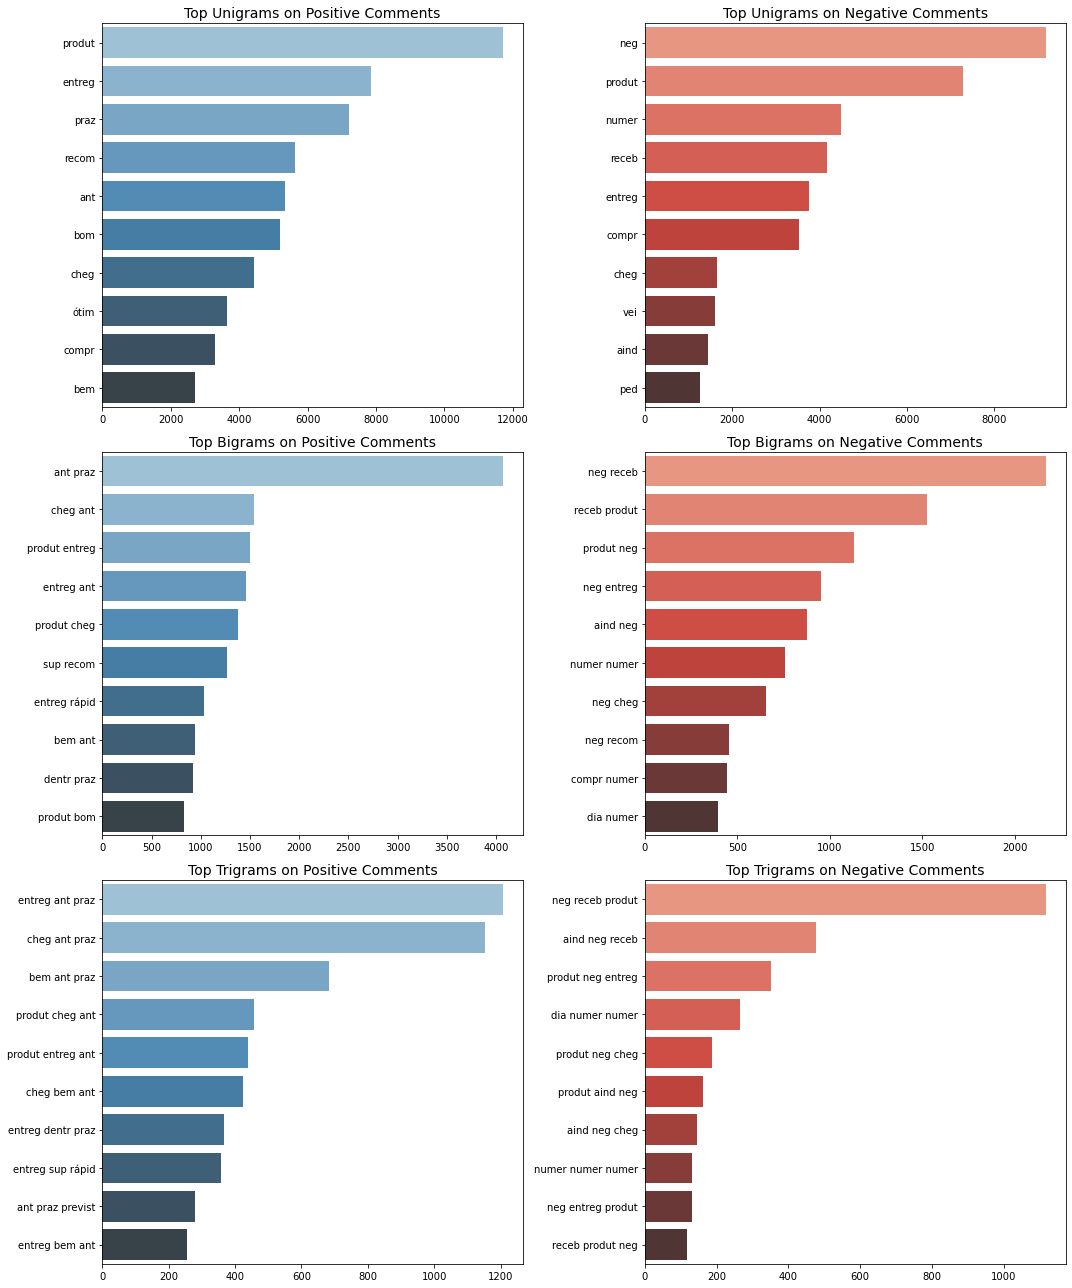

In [94]:
# Joining everything in a python dictionary to make the plots easier
ngram_dict_plot = {
    'Top Unigrams on Positive Comments': unigrams_pos,
    'Top Unigrams on Negative Comments': unigrams_neg,
    'Top Bigrams on Positive Comments': bigrams_pos,
    'Top Bigrams on Negative Comments': bigrams_neg,
    'Top Trigrams on Positive Comments': trigrams_pos,
    'Top Trigrams on Negative Comments': trigrams_neg,
}

# Plotting the ngrams analysis
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 18))
i, j = 0, 0
colors = ['Blues_d', 'Reds_d']
for title, ngram_data in ngram_dict_plot.items():
    ax = axs[i, j]
    sns.barplot(x='count', y='ngram', data=ngram_data, ax=ax, palette=colors[j])
    
    # Customizing plots
    #format_spines(ax, right_border=False)
    ax.set_title(title, size=14)
    ax.set_ylabel('')
    ax.set_xlabel('')
    
    # Incrementing the index
    j += 1
    if j == 2:
        j = 0
        i += 1
plt.tight_layout()
plt.show()

# ngram - m√≥veis de escrit√≥rio em Itaquaquecetuba

In [95]:
transformacao_final1 = data_itaqua_moveis[['review_score', 'review']]

In [96]:
transformacao_final1

review_score                                             review
170               5  mega recomendo recebi produto corretamente den...
277               5  produto ok prazo estendido por√©m entregue praz...
291               4                indico loja compro sempre lannister
320               1             tampo mesa chegou todo amassado batido
338               1  produto passou prazo entregar tento resolver p...
...             ...                                                ...
44669             5  produto entregue bastante anteced√™ncia veio be...
44910             5                             prazo entrega cumprido
45047             5  adorei cadeira bonita confort√°vel f√°cil montar...
45147             1  insatisfeita cadeira veio defeito fabrica solt...
45153             1  produto veio furos errado montagem infelizment...

[420 rows x 2 columns]

In [97]:
# Labelling data
score_map = {
    1: 'negativo',
    2: 'negativo',
    4: 'positivo',
    5: 'positivo'
}
transformacao_final1['sentiment_label'] = transformacao_final1['review_score'].map(score_map)

# Verifying results
fig, ax = plt.subplots(figsize=(7, 7))
%matplotlib inline

<ipython-input-97-73242d2305a5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transformacao_final1['sentiment_label'] = transformacao_final1['review_score'].map(score_map)


In [98]:
def ngrams_count(corpus, ngram_range, n=-1, cached_stopwords=stopwords.words('portuguese')):
    """
    Args
    ----------
    corpus: text to be analysed [type: pd.DataFrame]
    ngram_range: type of n gram to be used on analysis [type: tuple]
    n: top limit of ngrams to be shown [type: int, default: -1]
    """
    
    # Using CountVectorizer to build a bag of words using the given corpus
    vectorizer = CountVectorizer(stop_words=cached_stopwords, ngram_range=ngram_range).fit(corpus)
    bag_of_words = vectorizer.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    total_list = words_freq[:n]
    
    # Returning a DataFrame with the ngrams count
    count_df = pd.DataFrame(total_list, columns=['ngram', 'count'])
    return count_df

In [99]:
# Splitting the corpus into positive and negative comments
positive_comments = transformacao_final1.query('sentiment_label == "positivo"')['review']
negative_comments = transformacao_final1.query('sentiment_label == "negativo"')['review']

# Extracting the top 10 unigrams by sentiment
unigrams_pos = ngrams_count(positive_comments, (1, 1), 10)
unigrams_neg = ngrams_count(negative_comments, (1, 1), 10)

# Extracting the top 10 unigrams by sentiment
bigrams_pos = ngrams_count(positive_comments, (2, 2), 10)
bigrams_neg = ngrams_count(negative_comments, (2, 2), 10)

# Extracting the top 10 unigrams by sentiment
trigrams_pos = ngrams_count(positive_comments, (3, 3), 10)
trigrams_neg = ngrams_count(negative_comments, (3, 3), 10)

<AxesSubplot:xlabel='count', ylabel='ngram'>

Text(0.5, 1.0, 'Top Unigrams on Positive Comments')

Text(0, 0.5, '')

Text(0.5, 0, '')

<AxesSubplot:xlabel='count', ylabel='ngram'>

Text(0.5, 1.0, 'Top Unigrams on Negative Comments')

Text(0, 0.5, '')

Text(0.5, 0, '')

<AxesSubplot:xlabel='count', ylabel='ngram'>

Text(0.5, 1.0, 'Top Bigrams on Positive Comments')

Text(0, 0.5, '')

Text(0.5, 0, '')

<AxesSubplot:xlabel='count', ylabel='ngram'>

Text(0.5, 1.0, 'Top Bigrams on Negative Comments')

Text(0, 0.5, '')

Text(0.5, 0, '')

<AxesSubplot:xlabel='count', ylabel='ngram'>

Text(0.5, 1.0, 'Top Trigrams on Positive Comments')

Text(0, 0.5, '')

Text(0.5, 0, '')

<AxesSubplot:xlabel='count', ylabel='ngram'>

Text(0.5, 1.0, 'Top Trigrams on Negative Comments')

Text(0, 0.5, '')

Text(0.5, 0, '')

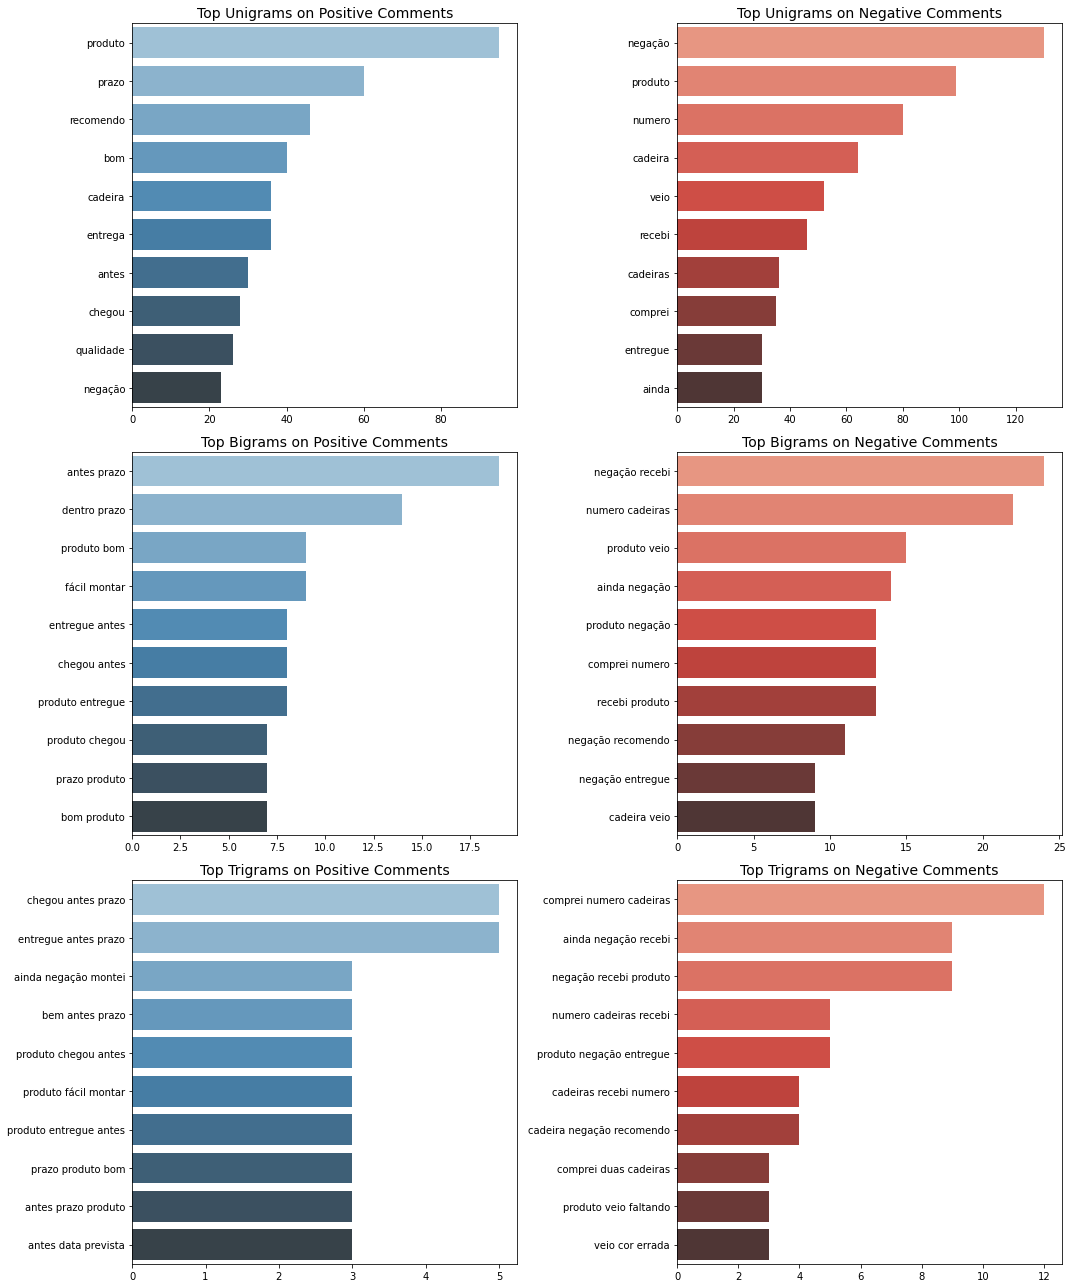

In [101]:
# Joining everything in a python dictionary to make the plots easier
ngram_dict_plot = {
    'Top Unigrams on Positive Comments': unigrams_pos,
    'Top Unigrams on Negative Comments': unigrams_neg,
    'Top Bigrams on Positive Comments': bigrams_pos,
    'Top Bigrams on Negative Comments': bigrams_neg,
    'Top Trigrams on Positive Comments': trigrams_pos,
    'Top Trigrams on Negative Comments': trigrams_neg,
}

# Plotting the ngrams analysis
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 18))
i, j = 0, 0
colors = ['Blues_d', 'Reds_d']
for title, ngram_data in ngram_dict_plot.items():
    ax = axs[i, j]
    sns.barplot(x='count', y='ngram', data=ngram_data, ax=ax, palette=colors[j])
    
    # Customizing plots
    #format_spines(ax, right_border=False)
    ax.set_title(title, size=14)
    ax.set_ylabel('')
    ax.set_xlabel('')
    
    # Incrementing the index
    j += 1
    if j == 2:
        j = 0
        i += 1
plt.tight_layout()
plt.show()